In [52]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../../ISANet/")
sys.path.insert(0, "../../experiments/")

from utils import optimize_monk_f, print_result, print_ls_result, save_csv
from isanet.optimizer import NCG, LBFGS
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Monk 1 - seed 108

Setting and global variable:

In [53]:
monk     =  "1"
reg      =  1e-4
seed     =  108 #108
results  =  []
ng_eps   =  1e-5
l_eps    =  1e-5
max_iter =  1000
verbose  =  0

In [54]:
#############################
#     NCG pr
#############################
beta_method = "pr" 
c1          = 1e-4 
c2          = .1 
restart     = None 
ln_maxiter  = 100
#############################
optimizer = NCG(beta_method=beta_method, c1=c1, c2=c2, restart=restart, 
                ln_maxiter = ln_maxiter, norm_g_eps = ng_eps, l_eps = l_eps)
model_history, opt_history, time = optimize_monk_f(monk=monk, 
                                                   reg = reg, 
                                                   seed=seed, 
                                                   optimizer=optimizer, 
                                                   max_iter = max_iter, 
                                                   verbose = verbose)
print("NCG PR - results")
print_result(f="Monk"+monk, opt=("NCG "+beta_method).upper(), c1=c1, c2=c2, r=restart, m="-", history=model_history, opt_history=opt_history, time=time)
print_ls_result(ls_max_iter=ln_maxiter, opt_history=opt_history)
f_pr = model_history["loss_mse_reg"]
#############################
# save result
#############################
df = save_csv(path="./results/PR_PRP/m1-108_pr.csv", f="loss_mse_reg", model_history=model_history, opt_history=opt_history)

NCG PR - results
╒═══════╤═════════════╤════════╤══════╤═══════════╤═════╤════════╤══════════╤═══════════════╤════════════╕
│ f     │ Optimizer   │     c1 │   c2 │ restart   │ m   │   Loss │     ‖gk‖ │   Conv. Iter. │   Time (s) │
╞═══════╪═════════════╪════════╪══════╪═══════════╪═════╪════════╪══════════╪═══════════════╪════════════╡
│ Monk1 │ NCG PR      │ 0.0001 │  0.1 │           │ -   │ 0.0263 │ 6.98e-06 │           126 │       1.06 │
╘═══════╧═════════════╧════════╧══════╧═══════════╧═════╧════════╧══════════╧═══════════════╧════════════╛
╒════════════════╤════════════╤═══════════════╤═══════════════╕
│   Ls Max Iter. │   Ls Iter. │   Ls Hit Rate │   Ls Time (s) │
╞════════════════╪════════════╪═══════════════╪═══════════════╡
│            100 │        747 │             1 │          0.83 │
╘════════════════╧════════════╧═══════════════╧═══════════════╛


In [55]:
#############################
#     NCG pr+
#############################
beta_method = "pr+" 
c1          = 1e-4 
c2          = .1 
restart     = None 
ln_maxiter  = 100
#############################
optimizer = NCG(beta_method=beta_method, c1=c1, c2=c2, restart=restart, 
                ln_maxiter = ln_maxiter, norm_g_eps = ng_eps, l_eps = l_eps)
model_history, opt_history, time = optimize_monk_f(monk=monk, 
                                                   reg = reg, 
                                                   seed=seed, 
                                                   optimizer=optimizer, 
                                                   max_iter = max_iter, 
                                                   verbose = verbose)
print("NCG PR+ - results")
print_result(f="Monk"+monk, opt=("NCG "+beta_method).upper(), c1=c1, c2=c2, r=restart, m="-", history=model_history, opt_history=opt_history, time=time)
print_ls_result(ls_max_iter=ln_maxiter, opt_history=opt_history)
f_pr_plus = model_history["loss_mse_reg"]
#############################
# save result
#############################
df = save_csv(path="./results/PR_PRP/m1-108_prp.csv", f="loss_mse_reg", model_history=model_history, opt_history=opt_history)

NCG PR+ - results
╒═══════╤═════════════╤════════╤══════╤═══════════╤═════╤════════╤══════════╤═══════════════╤════════════╕
│ f     │ Optimizer   │     c1 │   c2 │ restart   │ m   │   Loss │     ‖gk‖ │   Conv. Iter. │   Time (s) │
╞═══════╪═════════════╪════════╪══════╪═══════════╪═════╪════════╪══════════╪═══════════════╪════════════╡
│ Monk1 │ NCG PR+     │ 0.0001 │  0.1 │           │ -   │ 0.0263 │ 9.19e-06 │           103 │       0.93 │
╘═══════╧═════════════╧════════╧══════╧═══════════╧═════╧════════╧══════════╧═══════════════╧════════════╛
╒════════════════╤════════════╤═══════════════╤═══════════════╕
│   Ls Max Iter. │   Ls Iter. │   Ls Hit Rate │   Ls Time (s) │
╞════════════════╪════════════╪═══════════════╪═══════════════╡
│            100 │        595 │             1 │          0.67 │
╘════════════════╧════════════╧═══════════════╧═══════════════╛


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


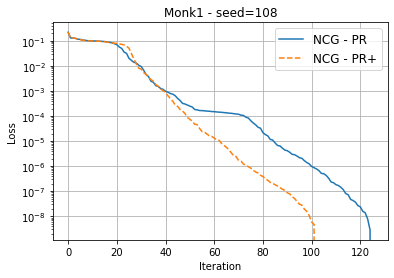

In [56]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(f_pr - f_pr[-1], linestyle='-')
plt.plot(f_pr_plus - f_pr_plus[-1], linestyle = '--')
plt.title('Monk'+monk+' - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')   
plt.savefig('./results/PR_PRP/m1-108_pr_prp.eps', format='eps')
plt.show()

# Monk 1 - seed 206

In [57]:
monk     =  "1"
reg      =  1e-4
seed     =  206
results  =  []
ng_eps   =  1e-5
l_eps    =  1e-5
max_iter =  1000
verbose  =  0

In [58]:
#############################
#     NCG pr
#############################
beta_method = "pr" 
c1          = 1e-4 
c2          = .3 
restart     = None 
ln_maxiter  = 100
#############################
optimizer = NCG(beta_method=beta_method, c1=c1, c2=c2, restart=restart, 
                ln_maxiter = ln_maxiter, norm_g_eps = ng_eps, l_eps = l_eps)
model_history, opt_history, time = optimize_monk_f(monk=monk, 
                                                   reg = reg, 
                                                   seed=seed, 
                                                   optimizer=optimizer, 
                                                   max_iter = max_iter, 
                                                   verbose = verbose)
print("NCG PR - results")
print_result(f="Monk"+monk, opt=("NCG "+beta_method).upper(), c1=c1, c2=c2, r=restart, m="-", history=model_history, opt_history=opt_history, time=time)
print_ls_result(ls_max_iter=ln_maxiter, opt_history=opt_history)
f_pr = model_history["loss_mse_reg"]
#############################
# save result
#############################
df = save_csv(path="./results/PR_PRP/m1-206_pr.csv", f="loss_mse_reg", model_history=model_history, opt_history=opt_history)

NCG PR - results
╒═══════╤═════════════╤════════╤══════╤═══════════╤═════╤════════╤═════════╤═══════════════╤════════════╕
│ f     │ Optimizer   │     c1 │   c2 │ restart   │ m   │   Loss │    ‖gk‖ │   Conv. Iter. │   Time (s) │
╞═══════╪═════════════╪════════╪══════╪═══════════╪═════╪════════╪═════════╪═══════════════╪════════════╡
│ Monk1 │ NCG PR      │ 0.0001 │  0.3 │           │ -   │ 0.0265 │ 5.4e-06 │           305 │       3.29 │
╘═══════╧═════════════╧════════╧══════╧═══════════╧═════╧════════╧═════════╧═══════════════╧════════════╛
╒════════════════╤════════════╤═══════════════╤═══════════════╕
│   Ls Max Iter. │   Ls Iter. │   Ls Hit Rate │   Ls Time (s) │
╞════════════════╪════════════╪═══════════════╪═══════════════╡
│            100 │       1591 │             1 │          2.52 │
╘════════════════╧════════════╧═══════════════╧═══════════════╛


In [59]:
#############################
#     NCG pr+
#############################
beta_method = "pr+" 
c1          = 1e-4 
c2          = .3 
restart     = None 
ln_maxiter  = 100
#############################
optimizer = NCG(beta_method=beta_method, c1=c1, c2=c2, restart=restart, 
                ln_maxiter = ln_maxiter, norm_g_eps = ng_eps, l_eps = l_eps)
model_history, opt_history, time = optimize_monk_f(monk=monk, 
                                                   reg = reg, 
                                                   seed=seed, 
                                                   optimizer=optimizer, 
                                                   max_iter = max_iter, 
                                                   verbose = verbose)
print("NCG PR+ - results")
print_result(f="Monk"+monk, opt=("NCG "+beta_method).upper(), c1=c1, c2=c2, r=restart, m="-", history=model_history, opt_history=opt_history, time=time)
print_ls_result(ls_max_iter=ln_maxiter, opt_history=opt_history)
f_pr = model_history["loss_mse_reg"]
#############################
# save result
#############################
df = save_csv(path="./results/PR_PRP/m1-206_prp.csv", f="loss_mse_reg", model_history=model_history, opt_history=opt_history)

NCG PR+ - results
╒═══════╤═════════════╤════════╤══════╤═══════════╤═════╤════════╤══════════╤═══════════════╤════════════╕
│ f     │ Optimizer   │     c1 │   c2 │ restart   │ m   │   Loss │     ‖gk‖ │   Conv. Iter. │   Time (s) │
╞═══════╪═════════════╪════════╪══════╪═══════════╪═════╪════════╪══════════╪═══════════════╪════════════╡
│ Monk1 │ NCG PR+     │ 0.0001 │  0.3 │           │ -   │ 0.0265 │ 8.41e-06 │           191 │       0.98 │
╘═══════╧═════════════╧════════╧══════╧═══════════╧═════╧════════╧══════════╧═══════════════╧════════════╛
╒════════════════╤════════════╤═══════════════╤═══════════════╕
│   Ls Max Iter. │   Ls Iter. │   Ls Hit Rate │   Ls Time (s) │
╞════════════════╪════════════╪═══════════════╪═══════════════╡
│            100 │        950 │             1 │          0.74 │
╘════════════════╧════════════╧═══════════════╧═══════════════╛


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


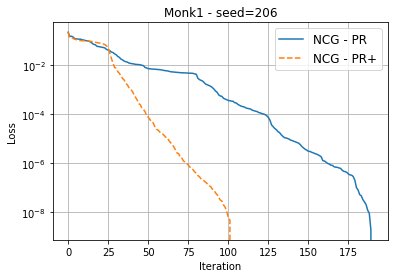

In [60]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(f_pr - f_pr[-1], linestyle='-')
plt.plot(f_pr_plus - f_pr_plus[-1], linestyle = '--')
plt.title('Monk'+monk+' - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')   
plt.savefig('./results/PR_PRP/m{}-{}_pr_prp.eps'.format(monk, seed), format='eps')
plt.show()